# Исследование разрешающей способности микроскопа методом Аббе

_Здесь и далее все величины по возможности переведены в СИ_

## 1. Дифракционная картина

In [1]:
# l - длина волны (м), L - расстояние от сетки до экрана (м)
# Мы их сразу переведем в СИ
l = 532*10**(-9)
L = 122*10**(-2)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [3]:
data1 = pd.read_csv('1.csv')

In [4]:
data1.head()

,m,dx
0,1,32.833333
1,2,21.800000
2,3,10.954545
3,4,5.500000
4,5,4.166667


Переведем данные эксперимента в СИ:

In [5]:
data1['dx_SI'] = data1['dx'] * 10**(-3)

Для каждого $\Delta x$ пересчитаем свою $d$ по формуле: $d = \cfrac{\lambda}{\Delta x} L$

In [6]:
data1['d'] = l / data1['dx_SI'] * L

In [7]:
data1[['m', 'd']].head()

,m,d
0,1,0.000020
1,2,0.000030
2,3,0.000059
3,4,0.000118
4,5,0.000156


По этим данным можно определить угол дифракции: $d \cdot \sin \theta_x = m_x \lambda$

$\theta_x = \cfrac{m_x \lambda}{d}$. Подсчитаем для $m_x = 1$, остальное получается простым домножением

In [8]:
data1['theta'] = l / data1['d']

In [9]:
data1.head()

,m,dx,dx_SI,d,theta
0,1,32.833333,0.032833,0.000020,0.026913
1,2,21.800000,0.021800,0.000030,0.017869
2,3,10.954545,0.010955,0.000059,0.008979
3,4,5.500000,0.005500,0.000118,0.004508
4,5,4.166667,0.004167,0.000156,0.003415


## 2. Увеличенное изображение

In [10]:
# Занесем данные с установки
(f1, f2, a1, b1, a2, b2) = (110*10**(-3), 25*10**(-3), 
                            144*10**(-3), (120+395 - 25*10**(-3))*10**(-3), 
                            25*10**(-3), 610*10**(-3))

In [11]:
data2 = pd.read_csv('2.csv')

In [12]:
data2.head()

,m,dx
0,1,2.000000
1,2,2.850000
2,3,5.777778
3,4,11.583333
4,5,15.444444


Переведем данные эксперимента в СИ:

In [13]:
data2['dx_SI'] = data2['dx'] * 10**(-3)

Коэффициент увеличения $\text{Г} = \cfrac{b_1}{a_1} \cfrac{b_2}{a_2}$

In [14]:
G = b1/a1 * b2/a2
print(G)

87.25965277777777


Для каждого $\Delta x$ подсчитаем $d$ по формуле: $d = \cfrac{\Delta x}{\text{Г}}$

In [15]:
data2['d'] = data2['dx_SI'] / G

In [16]:
data2[['m', 'd']].head()

,m,d
0,1,0.000023
1,2,0.000033
2,3,0.000066
3,4,0.000133
4,5,0.000177


In [17]:
data2[['m', 'd']]*10**6

,m,d
0,1000000,22.920100
1,2000000,32.661143
2,3000000,66.213623
3,4000000,132.745581
4,5000000,176.994108


Сравним эти периоды с полученными по дифракционной решетке. Для этого подсчитаем процентное отклонение

In [18]:
for i, perc in enumerate((data2['d'] - data1['d'])/data2['d']):
    print('Пластинка {} -- {}%'.format(i+1, round(perc*100, 2)))

Пластинка 1 -- 13.75%
Пластинка 2 -- 8.84%
Пластинка 3 -- 10.52%
Пластинка 4 -- 11.1%
Пластинка 5 -- 11.99%


Оба эксперимента неплохо сходятся

# 3. Разрешающая способность микроскопа и теория Аббе

## Разрешающая способность микроскопа

In [19]:
# Возьмем a1 из предыдущего пункта
a1

0.14400000000000002

In [20]:
data3 = pd.read_csv('3.csv')

In [21]:
data3.head()

,m,D
0,3,1.80
1,4,0.61
2,5,0.52


Переведем данные эксперимента в СИ:

In [22]:
data3['D_SI'] = data3['D'] * 10**(-3)

Для каждого $D$ подсчитаем минимальное разрешаемое объективом расстояние по формуле:
$l_\text{min} \approx \cfrac{\lambda \cdot 2f}{D}$, где $f = a_1$

In [23]:
data3['l_min'] = l*2*a1/data3['D_SI']

In [24]:
data3

,m,D,D_SI,l_min
0,3,1.80,0.00180,0.000085
1,4,0.61,0.00061,0.000251
2,5,0.52,0.00052,0.000295


Лабник говорит, что $l_\text{min}$ должно быть соизмеримо с $d$, намеренными в предыдущем эксперименте. Проверим это:

In [25]:
for m, perc in zip(data3.m, (data2.d[data2.m.isin(data3.m)].values - data3.l_min.values)/data3.l_min):
    print('Для решетки {} -- {}%'.format(m, round(abs(perc)*100, 2)))

Для решетки 3 -- 22.21%
Для решетки 4 -- 47.15%
Для решетки 5 -- 39.93%


Так себе сходимость, но имеем, что имеем. Выведем разрешающую способность в мкм:

In [26]:
for m, l_m in zip(data3.m, (data3*10**6).l_min):
    print("Для решетики {} -- {} мкм".format(m ,round(l_m, 1)))

Для решетики 3 -- 85.1 мкм
Для решетики 4 -- 251.2 мкм
Для решетики 5 -- 294.6 мкм


## Проверка теории Аббе

Построим график $d = f(1/D)$, взяв $d$ из п.1

In [27]:
n_dots = 1000
_x = np.linspace(1/np.max(data3.D_SI), 1/np.min(data3.D_SI), n_dots)
_y = np.linspace(np.min(data1.d), np.max(data1.d), n_dots)

In [28]:
data1

,m,dx,dx_SI,d,theta
0,1,32.833333,0.032833,0.000020,0.026913
1,2,21.800000,0.021800,0.000030,0.017869
2,3,10.954545,0.010955,0.000059,0.008979
3,4,5.500000,0.005500,0.000118,0.004508
4,5,4.166667,0.004167,0.000156,0.003415


In [29]:
data3

,m,D,D_SI,l_min
0,3,1.80,0.00180,0.000085
1,4,0.61,0.00061,0.000251
2,5,0.52,0.00052,0.000295


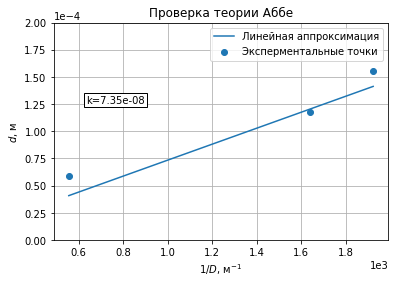

In [30]:
fig, ax = plt.subplots()
# Экспериментальные точки
ax.scatter(1/data3.D_SI, data1.d[data1.m.isin(data3.m)], label='Эксперментальные точки')
# TODO: поменяйте на свое значение
ax.set_ylim(0, 0.0002)

# В линейной модели будет делать fix intercept
model = LinearRegression(fit_intercept=False)
model.fit(_x.reshape(-1, 1), _y.reshape(-1, 1))
# Строим линейную аппроксимацию
ax.plot(_x, model.predict(_x.reshape(-1, 1)), label='Линейная аппроксимация')

# Приводим график в божеский вид
ax.grid(which='major')
ax.set_title(r'Проверка теории Аббе')
ax.ticklabel_format(style='sci', scilimits=(0, 0))

# Подписи
ax.set_xlabel(r'$1/D$, м$^{-1}$')
ax.set_ylabel(r'$d$, м')
ax.legend()
fig.text(0.2, 0.6, r'k={}'.format(round(model.coef_[0][0], 10)),
        bbox={'facecolor':'white', 'alpha':1, 'pad':2})

plt.savefig('out1.pdf')
plt.show()

Ожидаемый угловой коэффициент: $k_t = 1.53 \cdot 10^{-7}$. Из графика $k = 7.35 \cdot 10^{-8}$. Что-то пошло не так.

Линейная аппроксимация: в принципе, неплохо, особенно с учетом того, что сняли только три точки. Посмотрим на MSE линейной аппроксимации (оценим R^2)

In [31]:
print(model.score(_x.reshape(-1, 1), _y.reshape(-1, 1)))

0.924767653573


In [32]:
# Угловой коэффициент
print(model.coef_)

[[  7.34625067e-08]]
